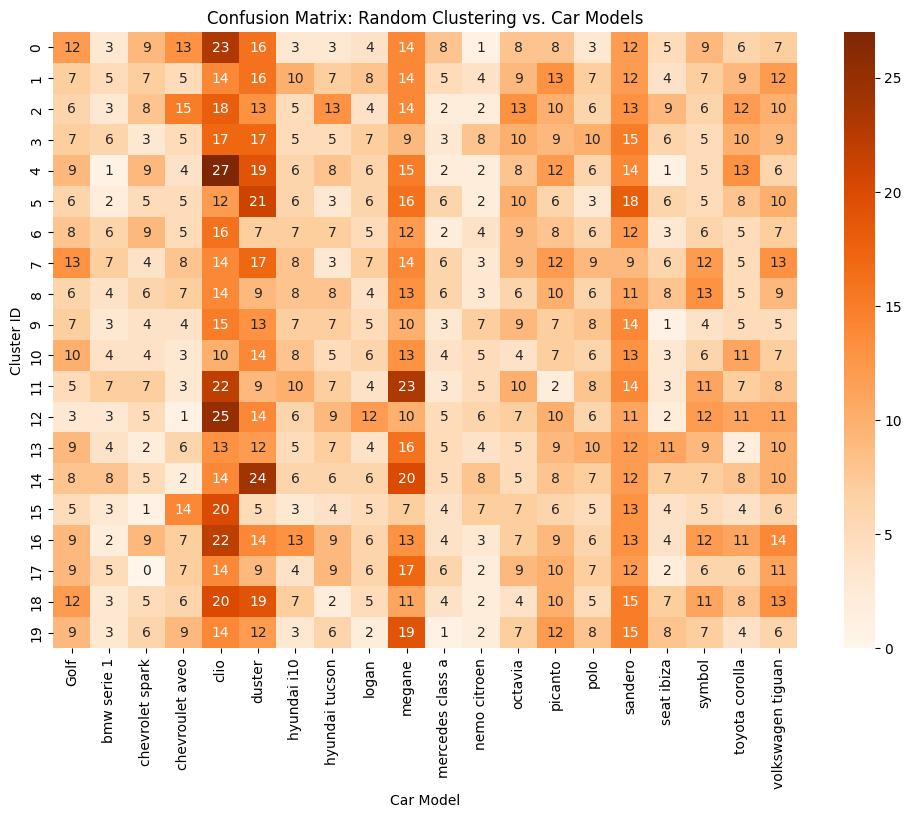

In [4]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import silhouette_score

# Define dataset path
dataset_path = r"D:\Master\Sem I\RestantaPML\Unsupervised\dataset\DATA"

# Check if dataset directory exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError("Dataset directory not found. Please verify the path.")

# Collect image paths and car model labels
image_paths = []
car_models = []

# Read images and collect metadata
for car_model in os.listdir(dataset_path):
    model_path = os.path.join(dataset_path, car_model)
    
    if os.path.isdir(model_path):
        for img_name in os.listdir(model_path):
            img_path = os.path.join(model_path, img_name)
            image_paths.append(img_path)
            car_models.append(car_model)

# Generate random labels for baseline comparison
num_samples = len(image_paths)  # Number of images
num_clusters = len(set(car_models))  # Number of clusters based on car models

np.random.seed(42)
random_labels = np.random.randint(0, num_clusters, size=num_samples)

# Simulate feature vectors for silhouette computation (random values)
X = np.random.rand(num_samples, 50)  # Assume 50-dimensional feature vectors

# Compute silhouette score for random labels
random_silhouette = silhouette_score(X, random_labels)

# Create DataFrame for random clustering results
random_df = pd.DataFrame({"Image": image_paths, "Cluster": random_labels, "CarModel": car_models})

# Create confusion matrix for random clustering
random_conf_matrix = pd.crosstab(random_df["Cluster"], random_df["CarModel"])

# Compute Cluster Purity for random clustering
random_majority_counts = random_conf_matrix.max(axis=1)
random_total_samples = random_conf_matrix.sum(axis=1)
random_purity_scores = random_majority_counts / random_total_samples
random_overall_purity = np.sum(random_majority_counts) / np.sum(random_total_samples)

# Display confusion matrix for random clustering
plt.figure(figsize=(12, 8))
sns.heatmap(random_conf_matrix, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Car Model")
plt.ylabel("Cluster ID")
plt.title("Confusion Matrix: Random Clustering vs. Car Models")
plt.show()

# Display comparison results
random_results = pd.DataFrame({
    "Metric": ["Silhouette Score", "Cluster Purity"],
    "Random Clustering": [random_silhouette, random_overall_purity]
})

In [5]:
# Print the computed Silhouette Score for random clustering
print(f"Silhouette Score (Random Clustering): {random_silhouette:.4f}")

Silhouette Score (Random Clustering): -0.0115
